In [310]:
import numpy as np
import random
from fractions import Fraction
from Commands import dec2int, bernoulli, control, order_parameter
from MonteCarloCommands import energy, boltzmann_probability
import matplotlib.pyplot as plt
import os
from itertools import repeat

In [311]:

length = 50
lenrange = [10,20,30]
times = 50
low_prob = 00
high_prob = 100 + 1
betarange =[0,0.1,0.2,0.3,0.4,(2/np.log(1+np.sqrt(2)))**(-1),0.5,0.6,0.7,1,10]
K = -1 
num_chains = 20
spacing = 100
num_points = int(np.ceil((high_prob-low_prob)/spacing))
NeelState1 = dec2int(Fraction(1,3),length)
NeelState2 = dec2int(Fraction(2,3),length)
#
#if K == 1:
#    path = 'D:/Lab Research Results/Simulation Results/AntiFerromagnet/beta = ' + str(Beta) + '/'
#else:
#    path = 'D:/Lab Research Results/Simulation Results/Ferromagnet/beta = ' + str(Beta) +'/'
#os.makedirs(path, exist_ok=True)



In [312]:
if (length**2//2) % 10 == 0:
#record = np.zeros([high_prob-low_prob, 1], dtype=float)
    time_size = (length**2)//200+1 # number of data points along the time axis

    record1 = np.zeros([num_points, time_size], dtype=float) #[probability, time]
    record2 = np.zeros([num_points, time_size], dtype=float)
    recordferro = np.zeros([times, num_points,time_size], dtype=float) # set up for ferromagnetic order parameter
    #record3 = np.zeros([high_prob-low_prob, 1], dtype=float)
    recordlong = np.zeros((num_points, time_size), dtype=float) #[probability, position, time]
    staggeredMagnetization = np.zeros((times, num_points,time_size), dtype=float)
    totalparam = np.zeros((num_points,time_size))
    totrecordlong = np.zeros((num_points, time_size))
    
else: 
    time_size = (length**2)//200+2 # number of data points along the time axis

    record1 = np.zeros([num_points, time_size], dtype=float) #[probability, time]
    record2 = np.zeros([num_points, time_size], dtype=float)
    recordferro = np.zeros([times, num_points,time_size], dtype=float) # set up for ferromagnetic order parameter
    #record3 = np.zeros([high_prob-low_prob, 1], dtype=float)
    recordlong = np.zeros((num_points, time_size), dtype=float)
    staggeredMagnetization = np.zeros((times, num_points,time_size), dtype=float)
    totalparam = np.zeros((num_points,time_size))
    totrecordlong = np.zeros((num_points, time_size))


In [313]:
arr = np.zeros((times, length, num_chains))


In [314]:
mag =np.zeros((times,len(lenrange),len(betarange)))
for k in range(0, times):
    ll = 0
    print(k)
    for length in lenrange:
        pcount=0
        num_chains=length
    # Probability of choosing the Control Map
        for Beta in betarange:
            #print(prob)
            #number1 = random.random()
            #number2 = random.random()
            #number3 = random.random()
            #number = tests[k]
            lattice =[random.getrandbits(length)]
            for i in range(num_chains-1):
                lattice.append(random.getrandbits(length))
            lattice = np.asarray(lattice)
            
            #rep3 = dec2int(number3, length)
            #print(k, rep, dec2int(Fraction(2, 3), length), dec2int(Fraction(1, 3), length))
            for nr in repeat(None, (length*num_chains)**2):
                x_pos = random.randint(0,num_chains-1)
                y_pos= random.randint(0,length-1)
                E_i = energy(x_pos,y_pos,lattice,num_chains,length,K,2==num_chains)
                if random.random() <= boltzmann_probability(E_i, -E_i, Beta):
                    lattice[x_pos] = lattice[x_pos]^(0b1<<y_pos)
                else:
                    pass
            #for i in range(length*num_chains):
                #if (i%100)==0 and i != (length**2)//2:
                    #record1[j, i//100] += order_parameter(rep1, length)/times
                    #record2[j, i//100] += order_parameter(rep2, length)/times
                    #recordferro[k, j, i//100] = np.abs((length-bin(lattice[0]).count('1')-bin(lattice[1]).count('1'))/(length))
                    #record3[j] += order_parameter(rep3, length)/times
                    #for y in range(length):
                    #    for x in range(num_chains):
                    #        staggeredMagnetization[k, j, i//100] += (-1)**(x+y+((lattice[x]&(1<<y))>>y))/(2*length)
                    #staggeredMagnetization[k,j,i//100]=((bin(rep1^NeelState1).count('1')+bin(rep2^NeelState2).count('1'))-length)/length
                    #recordlong[j, i//100] = (2*bin(rep1^rep2).count('1')-length)/length
            
                #if random.random() > (float(prob)/100):
                #    rep3 = bernoulli(rep3, length)
                #else:
                #    rep3 = control(rep3, length)
                

                # Initializing Ising Array for Monte Carlo Simulation
                        #format(rep3, '0'+str(length)+'b')]
                '''
                for repeat in range(1):
                    for y_pos in range(0, length): # this section takes about 1/100 s at length = 100, accounts for most of the run time
                        for x_pos in range(0, num_chains):
                            E_i = energy(x_pos, y_pos, lattice, num_chains, length, K, 2==num_chains)
                            old = lattice[x_pos]
                            # noinspection PyTypeChecker
                            
                            #E_f = energy(x_pos, y_pos, lattice, num_chains, length, K, 2==num_chains)
                            if random.random() <= boltzmann_probability(E_i, -E_i, Beta):
                                lattice[x_pos] = lattice[x_pos]^(0b1<<y_pos)
                            else:
                                pass '''
            mag[k,ll,pcount] = (num_chains*length - 2*np.sum([bin(p).count('1') for p in lattice]))/(num_chains*length)
            pcount+=1
        ll+=1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [315]:
13.37

13.37

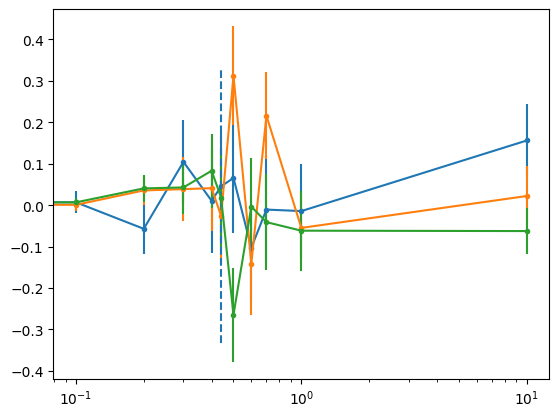

In [343]:
avgmag= np.average(((mag[:,:,:])),axis=0)
errmag= np.std((mag[:,:]),axis=0,ddof=1)/np.sqrt(times)
def binder(param):
    return 1-np.average(param**4, axis=0)/(3*np.average(param**2,axis=0)**2)
def binderr(param):
    first = -1/(3*np.average(param**2,axis=0)**2) * np.std((mag[:,:])**4,axis=0,ddof=1)/np.sqrt(times)
    second = np.average(param**4, axis=0)/(np.average(param**2,axis=0)**3)*np.std(mag[:,:]**2,axis=0,ddof=1)/np.sqrt(times)
    return np.sqrt(first**2+second**2)
fig,ax=plt.subplots()
for i in range(len(lenrange)):
    ax.errorbar(betarange,avgmag[i,:],marker='.',yerr=errmag[i,:])
ax.vlines((2/np.log(1+np.sqrt(2)))**(-1),-1/3,1/3, linestyles='dashed')

ax.set_xscale('log')

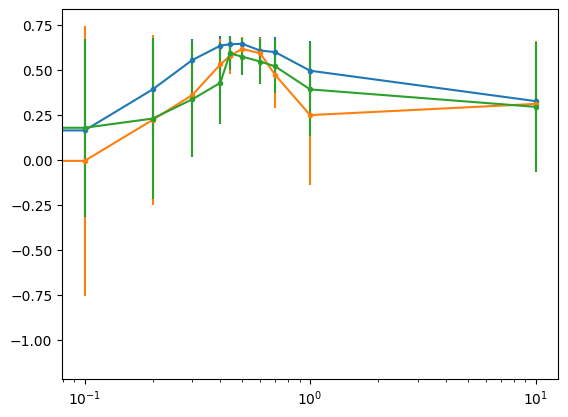

In [347]:
binde = binder(mag)
fig,ax=plt.subplots()
for i in range(len(lenrange)):
    ax.errorbar(betarange,binde[i,:],yerr = binderr(mag)[i,:], marker='.')
ax.set_xscale('log')
#ax.vlines((2/np.log(1+np.sqrt(2)))**(-1),0,1)


In [318]:
(2/np.log(1+np.sqrt(2)))**(-1)


np.float64(0.44068679350977147)

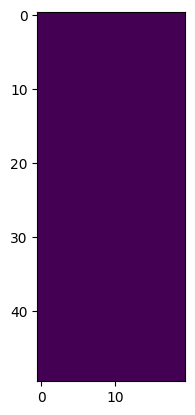

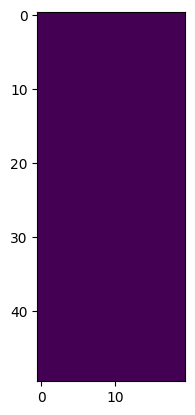

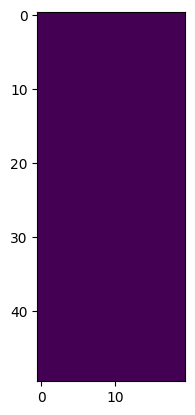

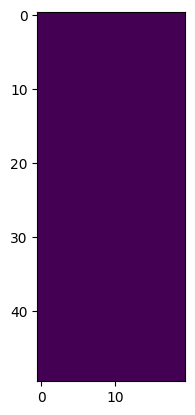

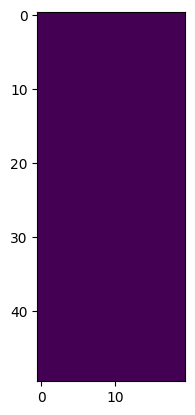

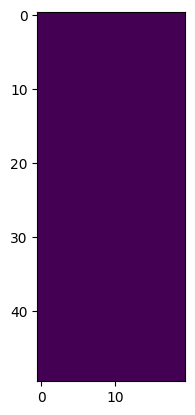

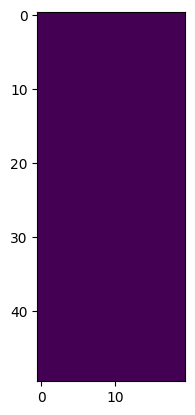

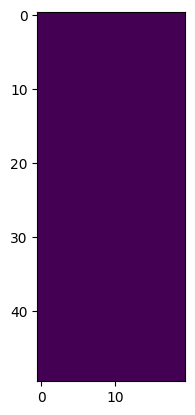

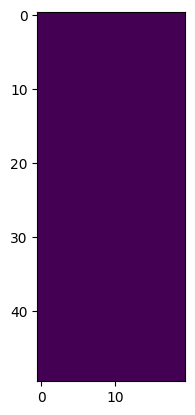

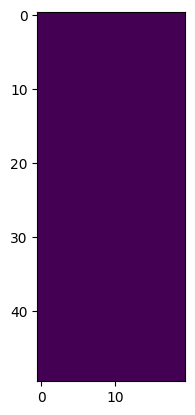

In [319]:
for n in range(10):
    fig,ax=plt.subplots()
    ax.imshow(arr[n,:,:])